In [1]:
import pandas as pd 
import numpy as np

### 심장질환 환자 예측 
#### 오차행렬

- 양성(Positive): 심장질환  환자를 의미.
- 음성(Negative): 정상 환자를 의미.


> True Positive (TP): 모델이 심장질환 환자를 올바르게 분류 한 경우
>  
> False Positive (FP): 모델이 정상 환자를 심장질환 환자로 잘못 분류한 경우(오진, error I)
>  
> True Negative (TN): 모델이 정상 환자를 정상으로 올바르게 분류한 경우 
> 
> False Negative (FN): 모델이 심장질환 환자를 정상으로 잘못 분류한 경우 (놓침, error II)  

> 정밀도 (Precision): 모델을 심장질환 환자로 예측하였을 때 정상적으로 실제 예측한 환자가 심장질환 환자인 경우의 비율
>
> 재현율 (Recall) :  실제 심장질환 환자 중에서 모델이 정확하게 심장질환 환자로 예측 하였는지의 비율
> 
> 🏆임계치를 낮춰서 재현율을 높여주는 것이 적합하다. (실제 심장질환 환자를 정상으로 잘못분류하지 않게끔 하기 위해)

In [2]:
df = pd.read_csv('./datasets/heartFailure.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.isna().sum() # 결측치 없음 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.duplicated().sum() # 중복된 행도 없음 

0

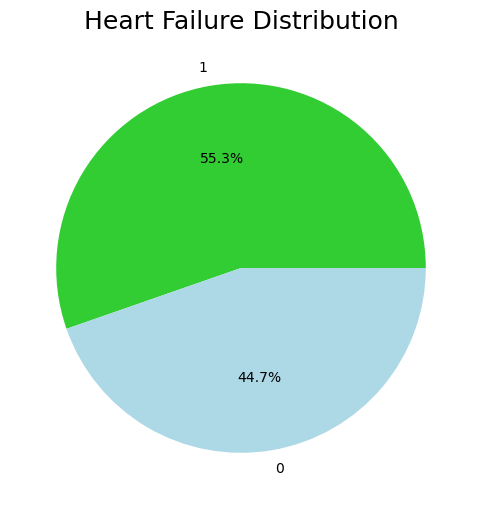

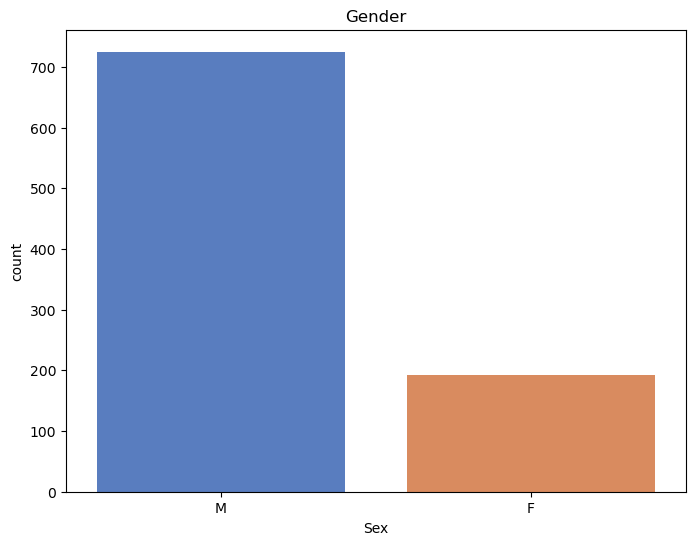

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

target_counts = df['HeartDisease'].value_counts()
labels= target_counts.index
values = target_counts.values
colors = ['limegreen', 'lightblue']


plt.figure(figsize=(10,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Heart Failure Distribution', fontsize=18)

fig, axes = plt.subplots(figsize=(8, 6))
sns.countplot(x='Sex', data=df, palette='muted')
plt.title('Gender')
plt.show()


In [6]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

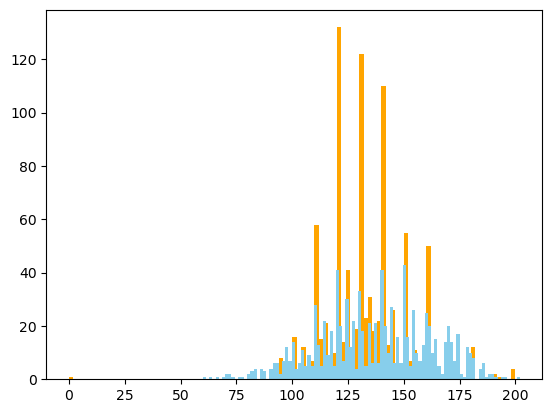

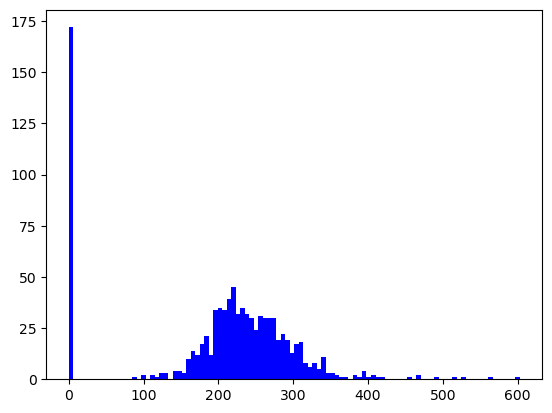

In [7]:
# 수치형 데이터 시각화 RestingBP ,Cholesterol , MaxHR
import matplotlib.pyplot as plt

plt.hist(df['RestingBP'], bins=100, color="orange")

plt.hist(df['MaxHR'], bins=100, color="skyblue")
plt.show()

plt.hist(df['Cholesterol'], bins=100, color="blue")
plt.show()

In [8]:
# 수치형 데이터들의 이상치 제거 하기 전 우선 각 데이터 프레임에 분리 
chol_df = df.loc[:,'Cholesterol'].reset_index()
max_df = df.loc[:,'MaxHR'].reset_index()
rb_df = df.loc[:,'RestingBP'].reset_index()

display(chol_df)
display(max_df)
display(rb_df)


,index,Cholesterol
0,0,289
1,1,180
2,2,283
3,3,214
4,4,195
...,...,...
913,913,264
914,914,193
915,915,131
916,916,236


,index,MaxHR
0,0,172
1,1,156
2,2,98
3,3,108
4,4,122
...,...,...
913,913,132
914,914,141
915,915,115
916,916,174


,index,RestingBP
0,0,140
1,1,160
2,2,130
3,3,138
4,4,150
...,...,...
913,913,110
914,914,144
915,915,130
916,916,130


In [9]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_chol = std.fit_transform(chol_df[['Cholesterol']])
std_chol

std_max = std.fit_transform(max_df[['MaxHR']])
std_max

std_rb = std.fit_transform(rb_df[['RestingBP']])
std_rb

array([[ 0.41090889],
       [ 1.49175234],
       [-0.12951283],
       [ 0.30282455],
       [ 0.95133062],
       [-0.66993455],
       [-0.12951283],
       [-1.21035628],
       [ 0.41090889],
       [-0.66993455],
       [-0.12951283],
       [ 0.1947402 ],
       [-0.66993455],
       [ 0.41090889],
       [-0.94014542],
       [-0.66993455],
       [-1.21035628],
       [-0.66993455],
       [-1.750778  ],
       [-0.66993455],
       [-1.750778  ],
       [-0.66993455],
       [-0.45376587],
       [ 0.95133062],
       [-0.12951283],
       [-0.12951283],
       [-0.45376587],
       [-0.66993455],
       [-1.04822976],
       [-0.39972369],
       [ 0.68111975],
       [-0.12951283],
       [-0.39972369],
       [-0.12951283],
       [ 0.95133062],
       [-0.39972369],
       [ 0.41090889],
       [-1.21035628],
       [-0.66993455],
       [ 0.95133062],
       [ 0.95133062],
       [-0.12951283],
       [ 0.95133062],
       [ 0.41090889],
       [-0.66993455],
       [-0

In [10]:
chol_df['Cholesterol'] = std_chol
display(chol_df)

max_df['MaxHR'] = std_max
display(max_df)

rb_df['RestingBP'] = std_rb
display(rb_df)

,index,Cholesterol
0,0,0.825070
1,1,-0.171961
2,2,0.770188
3,3,0.139040
4,4,-0.034755
...,...,...
913,913,0.596393
914,914,-0.053049
915,915,-0.620168
916,916,0.340275


,index,MaxHR
0,0,1.382928
1,1,0.754157
2,2,-1.525138
3,3,-1.132156
4,4,-0.581981
...,...,...
913,913,-0.188999
914,914,0.164684
915,915,-0.857069
916,916,1.461525


,index,RestingBP
0,0,0.410909
1,1,1.491752
2,2,-0.129513
3,3,0.302825
4,4,0.951331
...,...,...
913,913,-1.210356
914,914,0.627078
915,915,-0.129513
916,916,-0.129513


In [11]:
a1 = chol_df['Cholesterol'] >= -1.96
a2 = chol_df['Cholesterol'] <= 1.96
a = a1 & a2

df = df.loc[df[a].index].reset_index(drop=True)

b1 = max_df['MaxHR'] >= -1.96
b2 = max_df['MaxHR'] <= 1.96
b = b1 & b2

df = df.loc[df[b].index].reset_index(drop=True)

c1 = rb_df['RestingBP'] >= -1.96
c2 = rb_df['RestingBP'] <= 1.96
c = c1 & c2

df = df.loc[df[c].index].reset_index(drop=True)

df

C:\Users\user\AppData\Local\Temp\ipykernel_2544\668217372.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[df[b].index].reset_index(drop=True)
C:\Users\user\AppData\Local\Temp\ipykernel_2544\668217372.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[df[c].index].reset_index(drop=True)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
822,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
823,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
824,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
825,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


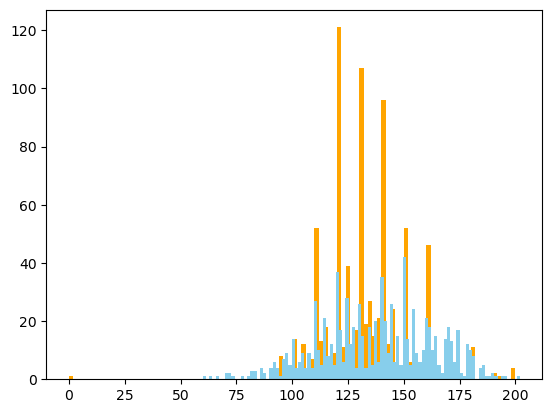

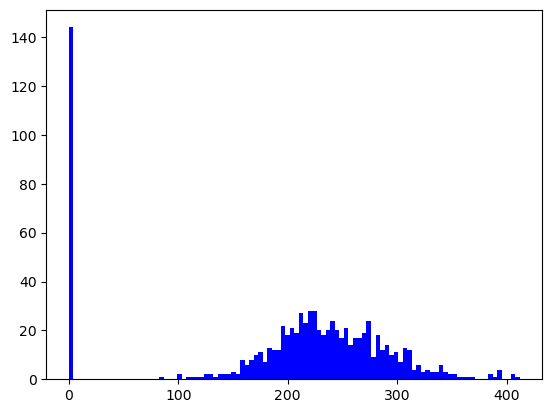

In [12]:
# 이상치 제거 후 시각화 

# 수치형 데이터 시각화 RestingBP ,Cholesterol , MaxHR
import matplotlib.pyplot as plt

plt.hist(df['RestingBP'], bins=100, color="orange")

plt.hist(df['MaxHR'], bins=100, color="skyblue")
plt.show()

plt.hist(df['Cholesterol'], bins=100, color="blue")
plt.show()

In [13]:
df['Cholesterol'].value_counts()


Cholesterol
0      144
254     11
220     10
223      9
211      9
      ... 
123      1
369      1
152      1
165      1
131      1
Name: count, Length: 208, dtype: int64

In [14]:
import numpy as np

zero_features = ['Cholesterol']

total_count = df.shape[0]

for feature in zero_features:
    zero_count = df[df[feature] == 0][feature].count()
    print(f'{feature}: {zero_count}건, {np.round(zero_count / total_count * 100, 4)}%') # 전처리 비중 

Cholesterol: 144건, 17.4123%


In [15]:
import numpy as np

num_features = ['Cholesterol']

total_count = df.shape[0]

for feature in num_features:
    num_count = df[(df[feature] >= 198.55) & (df[feature] < 199)][feature].count()
    print(f'{feature}: {num_count}건, {np.round(num_count / total_count * 100, 4)}%') # 전처리 비중 

Cholesterol: 0건, 0.0%


In [16]:
df[zero_features] = df[zero_features].replace(0, df[zero_features].mean())

In [17]:
df['Cholesterol'].value_counts().head(5)

Cholesterol
198.550181    144
254.000000     11
220.000000     10
223.000000      9
211.000000      9
Name: count, dtype: int64

In [18]:
import numpy as np

# 198.55 <= Cholesterol <= 199 조건에 해당하는 값을 평균 값으로 대체합니다.
df['Cholesterol'] = np.where((df['Cholesterol'] >= 198.55) & (df['Cholesterol'] <= 199), df['Cholesterol'].mean(), df['Cholesterol'])


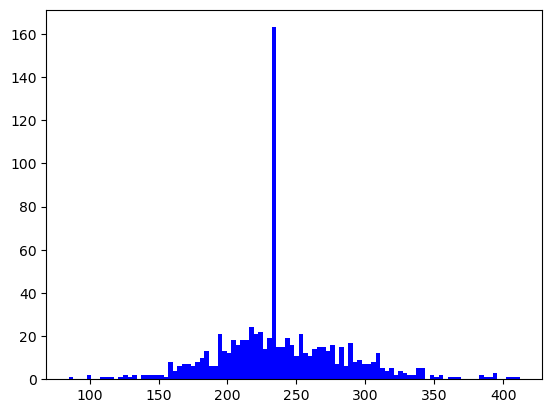

In [19]:
plt.hist(df['Cholesterol'], bins=100, color="blue")
plt.show()

In [20]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
822,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
823,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
824,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
825,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [21]:
enc_df = df.copy()

In [22]:
# LabelEncoder로 범주형 -> 수치형 변경 
from sklearn.preprocessing import LabelEncoder
# 범주형 데이터 -> gender, ever_married, work_type, Residence_type, smoking_status
chest = LabelEncoder()
chests = chest.fit_transform(df['ChestPainType'].tolist())
enc_df['ChestPainType'] = chests

Gender = LabelEncoder()
Genders = Gender.fit_transform(df['Sex'].tolist())
enc_df['Sex'] = Genders

RestingECG = LabelEncoder()
RestingECGs = RestingECG.fit_transform(df['RestingECG'].tolist())
enc_df['RestingECG'] = RestingECGs

ExerciseAngina = LabelEncoder()
ExerciseAnginas = ExerciseAngina.fit_transform(df['ExerciseAngina'].tolist())
enc_df['ExerciseAngina'] = ExerciseAnginas

ST_Slope = LabelEncoder()
ST_Slopes = ST_Slope.fit_transform(df['ST_Slope'].tolist())
enc_df['ST_Slope'] = ST_Slopes

In [23]:
enc_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
822,45,1,3,110,264.0,0,1,132,0,1.2,1,1
823,68,1,0,144,193.0,1,1,141,0,3.4,1,1
824,57,1,0,130,131.0,0,1,115,1,1.2,1,1
825,57,0,1,130,236.0,0,0,174,0,0.0,1,1


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

dtc = DecisionTreeClassifier()

features, targets = enc_df.iloc[:,:-1] , enc_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets,test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train) 


params = {
    'max_depth' : [5,6,7],
    'min_samples_split' : [15,16,17]
         }
grid_cv = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

# GridSearchCV 객체의 cv_results_ 속성을 데이터 프레임으로 생성
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['rank_test_score', 'params',   'split0_test_score',
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]


Fitting 5 folds for each of 9 candidates, totalling 45 fits
GridSearchCV 최고 평균 정확도 수치: 0.8200
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 5, 'min_samples_split': 15}


,rank_test_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,1,"{'max_depth': 5, 'min_samples_split': 15}",0.819549,0.818182,0.750000,0.848485,0.863636
1,2,"{'max_depth': 5, 'min_samples_split': 16}",0.819549,0.803030,0.757576,0.848485,0.863636
2,2,"{'max_depth': 5, 'min_samples_split': 17}",0.819549,0.803030,0.757576,0.848485,0.863636
3,4,"{'max_depth': 6, 'min_samples_split': 15}",0.781955,0.810606,0.772727,0.833333,0.886364
4,9,"{'max_depth': 6, 'min_samples_split': 16}",0.781955,0.795455,0.765152,0.833333,0.871212
5,8,"{'max_depth': 6, 'min_samples_split': 17}",0.781955,0.795455,0.765152,0.833333,0.886364
6,7,"{'max_depth': 7, 'min_samples_split': 15}",0.781955,0.818182,0.765152,0.833333,0.871212
7,6,"{'max_depth': 7, 'min_samples_split': 16}",0.781955,0.810606,0.750000,0.833333,0.901515
8,4,"{'max_depth': 7, 'min_samples_split': 17}",0.781955,0.810606,0.757576,0.833333,0.901515


In [25]:
dtc.feature_importances_

array([0.03213769, 0.0637757 , 0.08799917, 0.07242417, 0.0594729 ,
       0.02779964, 0.01637513, 0.13593218, 0.01543785, 0.06583582,
       0.42280977])

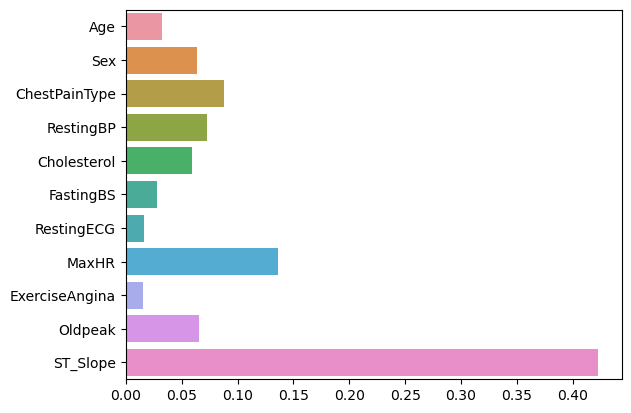

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

In [27]:
# plt.scatter(features.iloc[:,2], features.iloc[:,-1], c=targets)

### feature_importances_ 의 상위 2개만 따로 추출해서 GraphViz에 적용

In [28]:
a_df = enc_df[['MaxHR' , 'ST_Slope', 'HeartDisease']]
a_df

,MaxHR,ST_Slope,HeartDisease
0,172,2,0
1,156,1,1
2,98,2,0
3,108,1,1
4,122,2,0
...,...,...,...
822,132,1,1
823,141,1,1
824,115,1,1
825,174,1,1


In [29]:
import numpy as np

top_indices = np.argsort(dtc.feature_importances_)[::-1][:2]
top_features = features.columns[top_indices]
top_features


a_dtc = DecisionTreeClassifier(max_depth=4, random_state=124)

features, targets = a_df.iloc[:,:-1] , a_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets,test_size=0.2, random_state=124)

a_dtc.fit(X_train.values, y_train) 

DecisionTreeClassifier(max_depth=4, random_state=124)

In [30]:
from sklearn.tree import export_graphviz

# 특성 중요도 순서대로 클래스 이름을 가져옵니다.
class_names_str = list(map(str, targets))

# export_graphviz를 호출하여 결정 트리를 시각화합니다.
export_graphviz(a_dtc, out_file='./images/r_dtc01.dot',
                class_names=class_names_str,
                feature_names=features.columns,
                impurity=True, filled=True)

In [31]:
# 결정 트리를 통해 과적합 분석 
import graphviz

class_names_str = list(map(str, targets))

with open('./images/r_dtc01.dot') as f :
    r_dtc01 = f.read()

r_dtc01_graph = graphviz.Source(r_dtc01)

In [32]:
r_dtc01_graph.render(filename="r_dtc01", directory="./images", format="png")

'images\\r_dtc01.png'

<img src="./images/r_dtc01.png">

In [33]:
a_dtc.feature_importances_

array([0.16909439, 0.83090561])

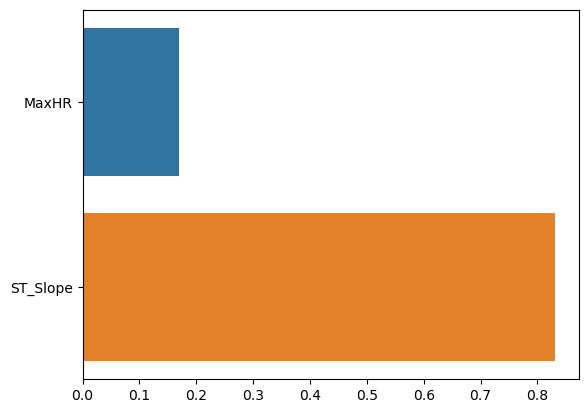

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=a_dtc.feature_importances_, y=features.columns)
plt.show()

In [35]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(a_dtc, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    a_dtc.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = a_dtc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)


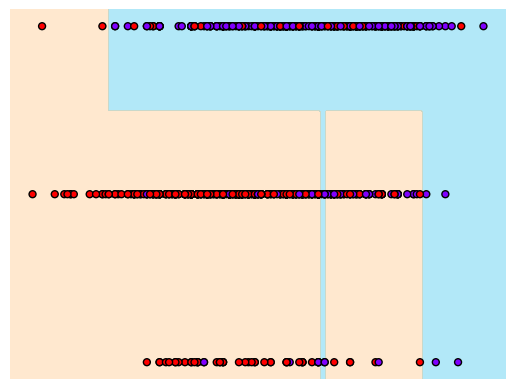

In [36]:
features_2_4 = features.iloc[:,[0,1]]
visualize_boundary(a_dtc, features_2_4, targets)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

dtc = DecisionTreeClassifier()

features, targets = enc_df.iloc[:,:-1] , enc_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets,test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train) 


params = {
    'max_depth' : [5,6,7],
    'min_samples_split' : [15,16,17]
         }
grid_cv = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

# GridSearchCV 객체의 cv_results_ 속성을 데이터 프레임으로 생성
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['rank_test_score', 'params',   'split0_test_score',
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

Fitting 5 folds for each of 9 candidates, totalling 45 fits
GridSearchCV 최고 평균 정확도 수치: 0.8215
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 5, 'min_samples_split': 17}


,rank_test_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,3,"{'max_depth': 5, 'min_samples_split': 15}",0.819549,0.803030,0.757576,0.848485,0.863636
1,5,"{'max_depth': 5, 'min_samples_split': 16}",0.819549,0.803030,0.750000,0.848485,0.863636
2,1,"{'max_depth': 5, 'min_samples_split': 17}",0.819549,0.818182,0.757576,0.848485,0.863636
3,2,"{'max_depth': 6, 'min_samples_split': 15}",0.781955,0.818182,0.772727,0.833333,0.886364
4,7,"{'max_depth': 6, 'min_samples_split': 16}",0.781955,0.795455,0.772727,0.833333,0.886364
5,8,"{'max_depth': 6, 'min_samples_split': 17}",0.781955,0.810606,0.772727,0.833333,0.856061
6,4,"{'max_depth': 7, 'min_samples_split': 15}",0.781955,0.818182,0.765152,0.833333,0.886364
7,6,"{'max_depth': 7, 'min_samples_split': 16}",0.781955,0.810606,0.750000,0.833333,0.901515
8,9,"{'max_depth': 7, 'min_samples_split': 17}",0.781955,0.795455,0.757576,0.833333,0.871212


In [38]:
from sklearn.metrics import accuracy_score

dtc = grid_cv.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 80.7229%


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[56 20]
 [12 78]]
정확도: 0.8072, 정밀도: 0.7959, 재현율: 0.8667, F1: 0.8298, ROC-AUC: 0.8018
################################################################################


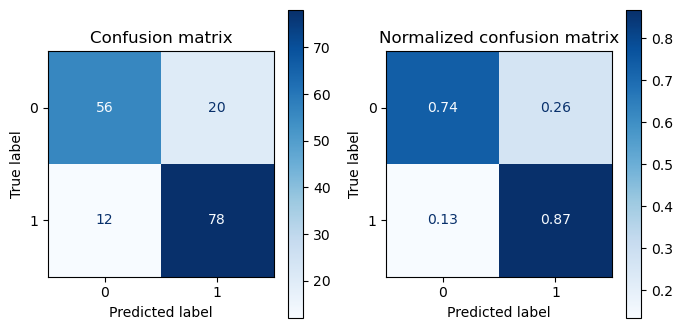

In [40]:
get_evaluation(y_test, prediction, dtc, X_test)

In [41]:
# 
#이 코드는 결정 트리 모델을 사용하여 테스트 세트에 대한 예측을 수행하고, 각 예측의 확률을 출력.

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.8928571428571429, 0.10714285714285714] 0
[0.05357142857142857, 0.9464285714285714] 1
[0.05357142857142857, 0.9464285714285714] 1
[0.23076923076923078, 0.7692307692307693] 1
[0.23076923076923078, 0.7692307692307693] 1
[0.8928571428571429, 0.10714285714285714] 0
[0.7714285714285715, 0.22857142857142856] 0
[1.0, 0.0] 0
[0.41025641025641024, 0.5897435897435898] 1
[0.05357142857142857, 0.9464285714285714] 1
[0.05357142857142857, 0.9464285714285714] 1
[0.8928571428571429, 0.10714285714285714] 0
[0.05357142857142857, 0.9464285714285714] 1
[0.05357142857142857, 0.9464285714285714] 1
[0.9735449735449735, 0.026455026455026454] 0
[0.05357142857142857, 0.9464285714285714] 1
[0.2, 0.8] 1
[0.05, 0.95] 1
[0.9735449735449735, 0.026455026455026454] 0
[0.05, 0.95] 1
[0.05357142857142857, 0.9464285714285714] 1
[0.9735449735449735, 0.026455026455026454] 0
[0.9735449735449735, 0.026455026455026454] 0
[0.05357142857142857, 0.9464285714285714] 1
[0.8928571428571429, 0.10714285714285714] 0
[0.9735449735449

In [42]:
from sklearn.preprocessing import Binarizer

threshold = 0.5


proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [43]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[56 20]
 [12 78]]
정확도: 0.8072, 정밀도: 0.7959, 재현율: 0.8667, F1: 0.8298, ROC-AUC: 0.8018
################################################################################


In [44]:
thresholds = [0.24, 0.3, 0.4, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.7]


def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)


0.24
오차 행렬
[[56 20]
 [11 79]]
정확도: 0.8133, 정밀도: 0.7980, 재현율: 0.8778, F1: 0.8360, ROC-AUC: 0.8073
################################################################################
0.3
오차 행렬
[[56 20]
 [11 79]]
정확도: 0.8133, 정밀도: 0.7980, 재현율: 0.8778, F1: 0.8360, ROC-AUC: 0.8073
################################################################################
0.4
오차 행렬
[[56 20]
 [11 79]]
정확도: 0.8133, 정밀도: 0.7980, 재현율: 0.8778, F1: 0.8360, ROC-AUC: 0.8073
################################################################################
0.5
오차 행렬
[[56 20]
 [12 78]]
정확도: 0.8072, 정밀도: 0.7959, 재현율: 0.8667, F1: 0.8298, ROC-AUC: 0.8018
################################################################################
0.51
오차 행렬
[[56 20]
 [12 78]]
정확도: 0.8072, 정밀도: 0.7959, 재현율: 0.8667, F1: 0.8298, ROC-AUC: 0.8018
################################################################################
0.52
오차 행렬
[[56 20]
 [12 78]]
정확도: 0.8072, 정밀도: 0.7959, 재현율: 0.8667, F1: 0.8298, ROC-AUC: 0.8018
################

In [45]:
from sklearn.preprocessing import Binarizer

threshold = 0.4 # 임계값을 0.4로 낮춰서 재현율 높힘 


proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [46]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[56 20]
 [11 79]]
정확도: 0.8133, 정밀도: 0.7980, 재현율: 0.8778, F1: 0.8360, ROC-AUC: 0.8073
################################################################################


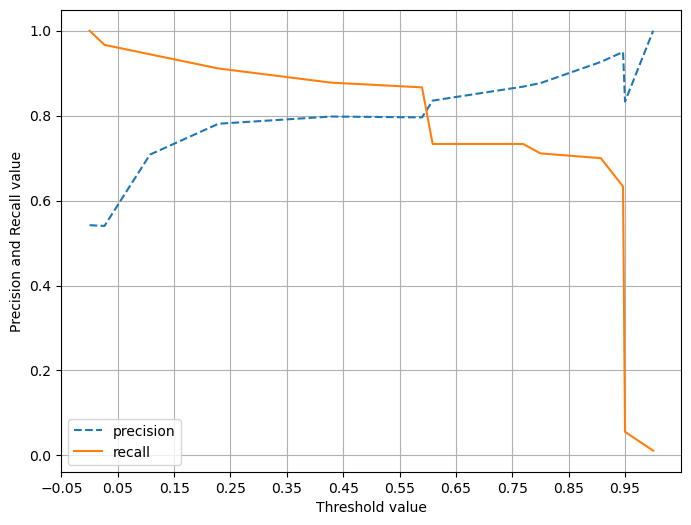

In [47]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

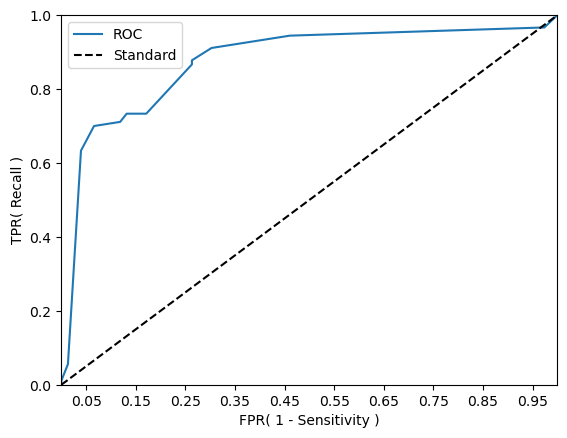

In [48]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [49]:
from sklearn.preprocessing import Binarizer

threshold = 0.4

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)


custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[56 20]
 [11 79]]
정확도: 0.8133, 정밀도: 0.7980, 재현율: 0.8778, F1: 0.8360, ROC-AUC: 0.8073
################################################################################


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_evaluation(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


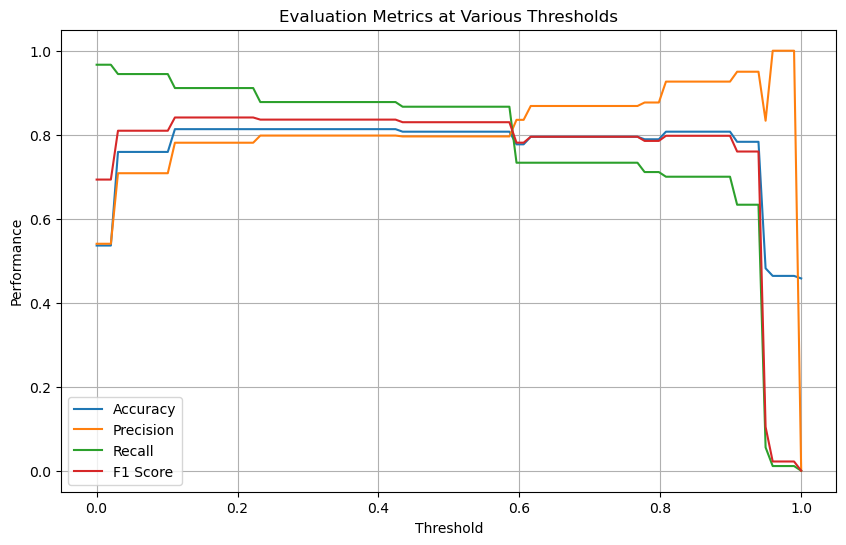

In [51]:
thresholds = np.linspace(0, 1, 100)
evaluations = []

for thresh in thresholds:
    binarizer = Binarizer(threshold=thresh)
    custom_prediction = binarizer.fit_transform(proba[:, 1].reshape(-1, 1))
    evaluations.append(get_evaluation(y_test, custom_prediction))

evaluations = np.array(evaluations)

# 각 성능 지표를 그래프로 나타내기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, evaluations[:, 0], label='Accuracy')
plt.plot(thresholds, evaluations[:, 1], label='Precision')
plt.plot(thresholds, evaluations[:, 2], label='Recall')
plt.plot(thresholds, evaluations[:, 3], label='F1 Score')
plt.title('Evaluation Metrics at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Performance')
plt.legend(loc='best')
plt.grid(True)
plt.show()